#### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from multiprocessing import Pool, cpu_count
import functions as fn

# nltk.download("punkt")
# nltk.download("stopwords")
# nltk.download("wordnet")

/Users/georgeandronikidis/Documents/mental-health-chatbot-and-sentiment-analysis/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


#### Dataframe exploration

In [2]:
df = pd.read_csv("/Users/georgeandronikidis/Documents/mental-health-chatbot-and-sentiment-analysis/Dataset/Combined Data.csv")
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [3]:
df.shape

(53043, 3)

In [4]:
df.describe()

,Unnamed: 0
count,53043.000000
mean,26521.000000
std,15312.339501
min,0.000000
25%,13260.500000
50%,26521.000000
75%,39781.500000
max,53042.000000


In [6]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [7]:
df.duplicated().sum()

1944

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

statement    6
status       0
dtype: int64

In [11]:
df.dropna(inplace = True)

#### Exploratory Data Analysis (EDA)

In [12]:
status_count = df["status"].value_counts()
status_count

status
Normal                  16040
Depression              15094
Suicidal                10644
Anxiety                  3623
Bipolar                  2501
Stress                   2296
Personality disorder      895
Name: count, dtype: int64

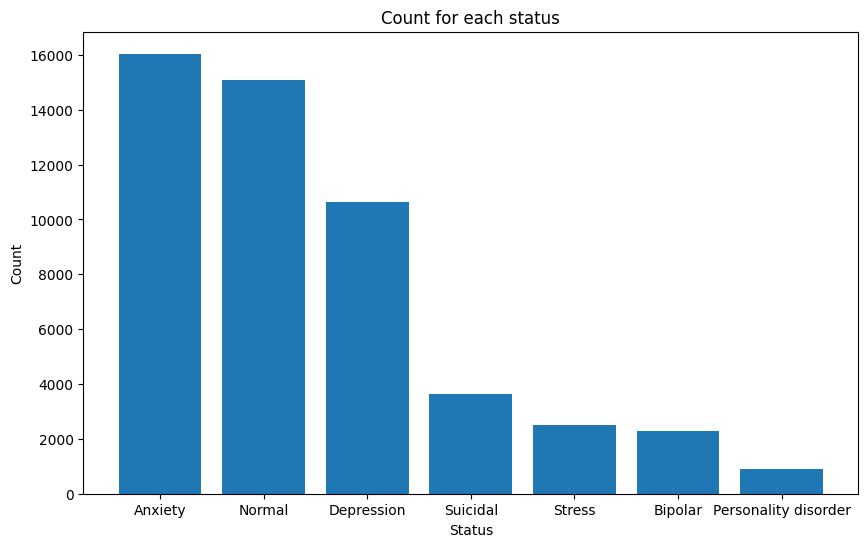

In [13]:
status_unique = df["status"].unique()

fig, ax = plt.subplots(figsize = (10,6))
ax.bar(status_unique, status_count, label = status_unique)
ax.set_xlabel("Status")
ax.set_ylabel("Count")
ax.set_title("Count for each status")
plt.show()

In [14]:
df["num_of_words"] = df["statement"].apply(lambda x: len(x.split()))
df['statement_length']=df['statement'].apply(lambda x:len(x))

In [15]:
df[df["num_of_words"] == df["num_of_words"].max()]

,statement,status,num_of_words,statement_length
13293,I cannot TAKE IT ANYMORE. I cannot TAKE IT ANY...,Suicidal,6300,32759


In [16]:
df[df["num_of_words"] == df["num_of_words"].min()]

,statement,status,num_of_words,statement_length
88,Anxious,Anxiety,1,7
424,anxious,Anxiety,1,7
753,chat.,Normal,1,5
834,cement,Normal,1,6
839,SEBASTIANN,Normal,1,10
...,...,...,...,...
42980,oishiieats,Normal,1,10
43135,thisisguan,Normal,1,10
43719,beeeaaach,Normal,1,9
44392,anothera,Normal,1,8


In [17]:
status_analysis = df.groupby('status').agg({
    'statement_length': ['mean', 'median', 'std'],
    'num_of_words': ['mean', 'median', 'std']
})

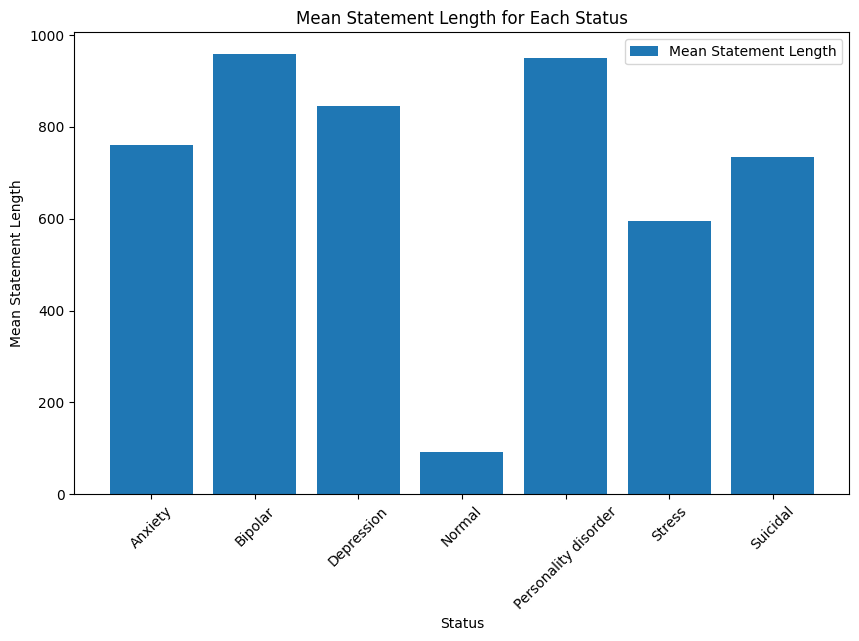

In [18]:
status_analysis = status_analysis.reset_index()
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(status_analysis["status"], status_analysis["statement_length"]["mean"], label="Mean Statement Length")
ax.set_xlabel("Status")
ax.set_ylabel("Mean Statement Length")
ax.set_title("Mean Statement Length for Each Status")
ax.legend()
plt.xticks(rotation=45)
plt.show()

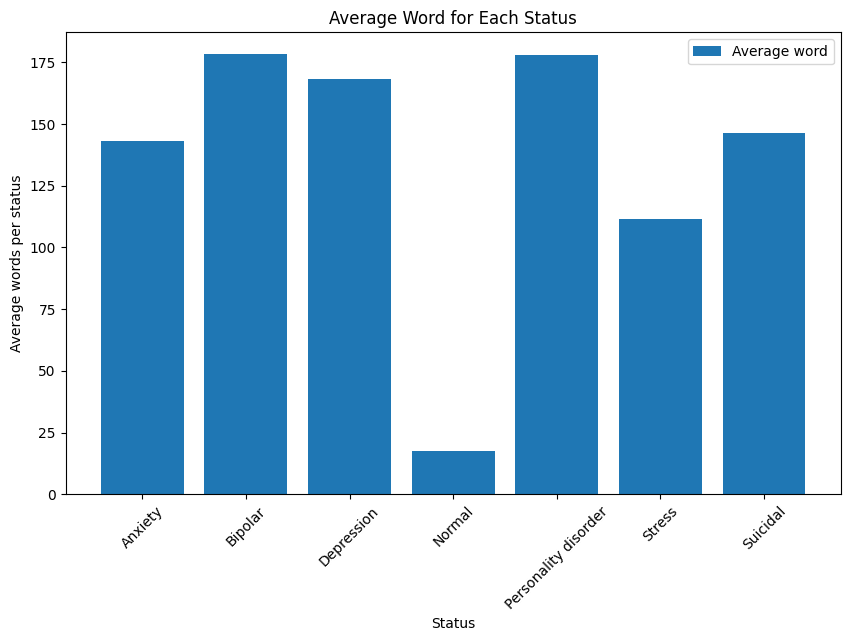

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(status_analysis["status"], status_analysis["num_of_words"]["mean"], label="Average word")
ax.set_xlabel("Status")
ax.set_ylabel("Average words per status")
ax.set_title("Average Word for Each Status")
ax.legend()
plt.xticks(rotation=45)
plt.show()

count    51093.000000
mean       575.600141
std        847.947705
min          2.000000
25%         79.000000
50%        313.000000
75%        745.000000
max      32759.000000
Name: statement_length, dtype: float64


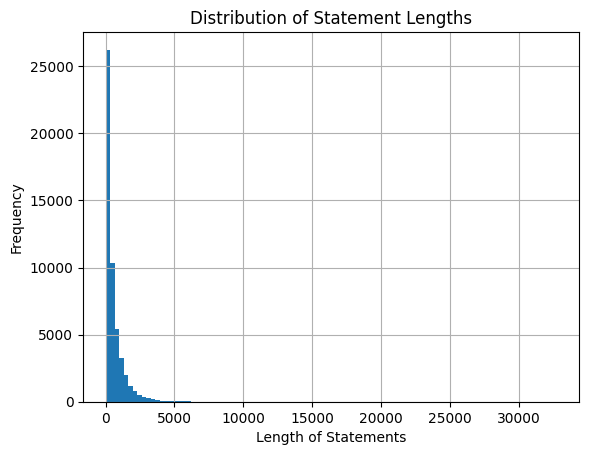

In [20]:
df['statement_length'] = df['statement'].apply(len)
print(df['statement_length'].describe())

df['statement_length'].hist(bins=100)
plt.title('Distribution of Statement Lengths')
plt.xlabel('Length of Statements')
plt.ylabel('Frequency')
plt.show()

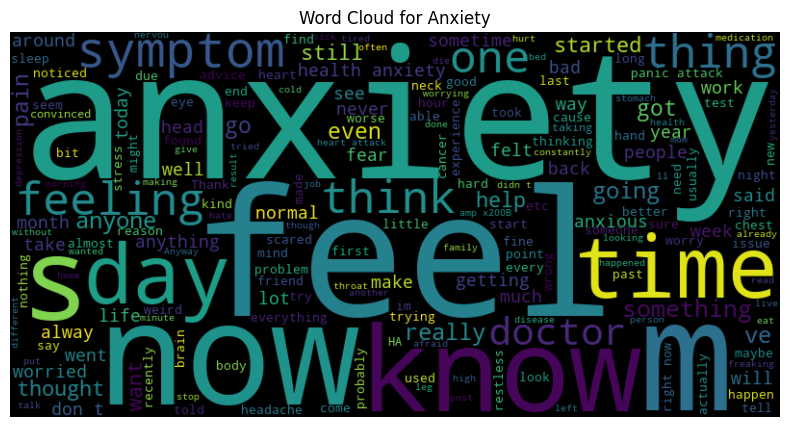

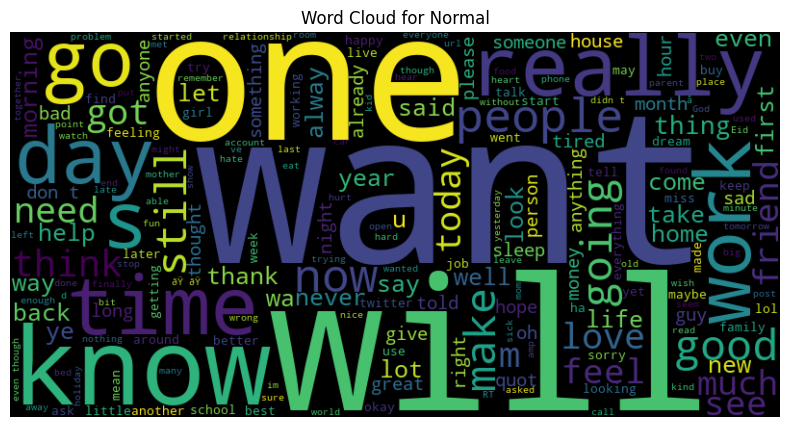

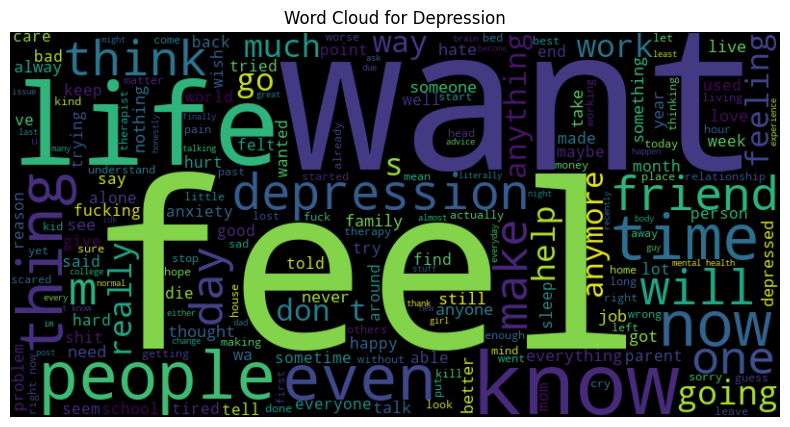

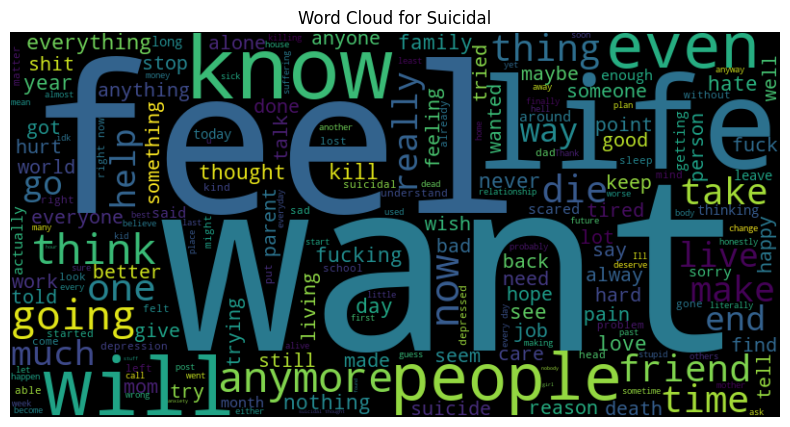

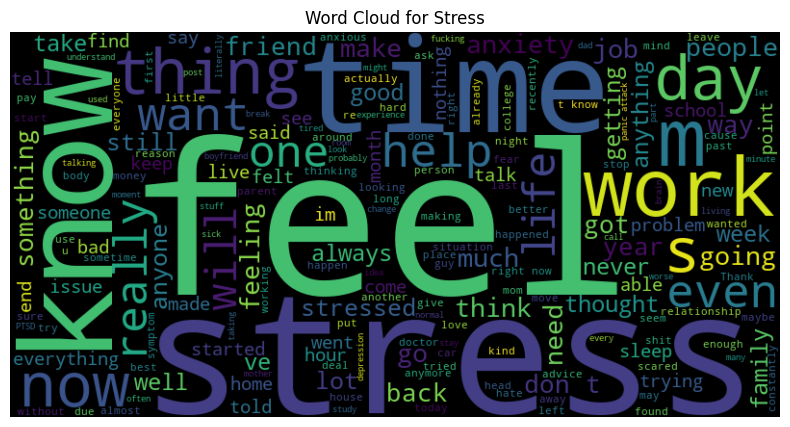

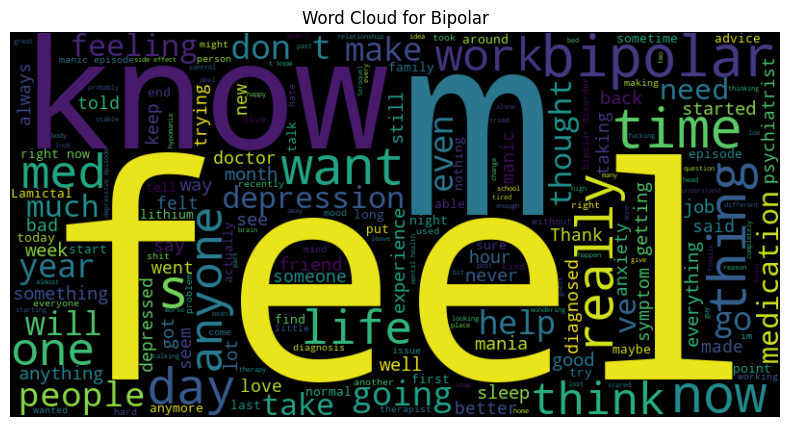

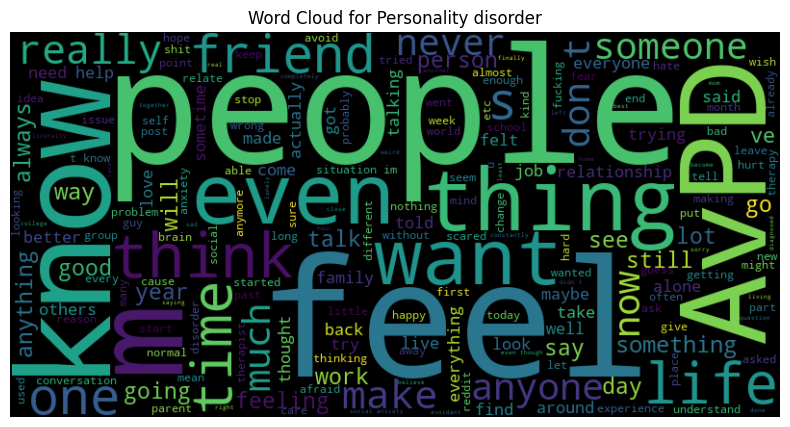

In [21]:
statuses = df['status'].unique()

for status in statuses:
    status_text = ' '.join(df[df['status'] == status]['statement'])
    fn.generate_word_cloud(status_text, title=f'Word Cloud for {status}')

#### Pre-processing

In [30]:
# Split the data into batches for multiprocessing
num_cores = cpu_count()
df_split = np.array_split(df, num_cores)

/Users/georgeandronikidis/Documents/mental-health-chatbot-and-sentiment-analysis/venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [31]:
# Create a multiprocessing Pool
with Pool(num_cores) as pool:
    # Preprocess the text in parallel
    results = pool.map(fn.preprocess_texts, [batch['statement'].tolist() for batch in df_split])

# Combine the results
df['cleaned_statement'] = [item for sublist in results for item in sublist]

# Display the first few rows of the DataFrame to confirm the changes
print(df[['statement', 'cleaned_statement']].head())

/Users/georgeandronikidis/Documents/mental-health-chatbot-and-sentiment-analysis/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/georgeandronikidis/Documents/mental-health-chatbot-and-sentiment-analysis/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/georgeandronikidis/Documents/mental-health-chatbot-and-sentiment-analysis/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/george

                                           statement  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   

                                   cleaned_statement  
0                                            oh gosh  
1    trouble sleep confused mind restless heart tune  
2  wrong dear forward doubt stay restless restles...  
3                           ve shift focus m worried  
4                 m restless restless month boy mean  


In [32]:
df.to_csv(r"Dataset/dataframe_cleaned.csv")